<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas et matplotlib
import pandas as pd

import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv

dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv

aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv

sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observations ou articles".format(population.shape[0]))
print("Le tableau comporte {} colonnes".format(population.shape[1]))

Le tableau comporte 1416 observations ou articles
Le tableau comporte 3 colonnes


In [4]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(population.shape[1]))
#La nature des données dans chacune des colonnes
print("La nature des données du tableau sont :" )
print (population.dtypes)
print ("")
#Le nombre de valeurs présentes dans chacune des colonnes
print("Le nombre de valeurs présentes dans chacune des colonnes :")
print(population.count())


Le tableau comporte 3 colonnes
La nature des données du tableau sont :
Zone       object
Année       int64
Valeur    float64
dtype: object

Le nombre de valeurs présentes dans chacune des colonnes :
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table
display(population.head(5))

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
population['Valeur']=population['Valeur']*1000

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur':'Population'}, inplace = True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
display(population.head(5))

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observations ou articles".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observations ou articles
Le tableau comporte 18 colonnes


In [10]:
#Consulter le nombre de colonnes
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [11]:
#Affichage les 5 premières lignes de la table
display (dispo_alimentaire.head(5))

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace =True)

display (dispo_alimentaire.head(5))

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
for elt in ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']:
    dispo_alimentaire[elt]*=1000000

In [14]:
#Affichage les 5 premières lignes de la table
display (dispo_alimentaire.head(5))

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observations ou articles".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observations ou articles
Le tableau comporte 4 colonnes


In [16]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(aide_alimentaire.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB
Le tableau comporte None colonnes


In [17]:
#Affichage les 5 premières lignes de la table
display (aide_alimentaire.head(5))

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'},inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur']*=1000


In [20]:
#Affichage les 5 premières lignes de la table
display (aide_alimentaire.head(5))

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observations ou articles".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonnes".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observations ou articles
Le tableau comporte 3 colonnes


In [22]:
#Consulter le nombre de colonnes
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [23]:
#Afficher les 5 premières lignes de la table
display (sous_nutrition.head(5))

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur']=pd.to_numeric(sous_nutrition['Valeur'],errors='coerce')

In [25]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur':'sous_nutrition'},inplace=True)

In [26]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition']=sous_nutrition['sous_nutrition']*1000000

In [27]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [28]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population2017=population.loc[population['Année']== 2017,]

sous_nutrition2017=sous_nutrition[sous_nutrition['Année'].str.contains('2016-2018')]

# fusion des données avec comme jointure Zone
pop2017_sn2017=pd.merge(population2017,sous_nutrition2017,on ='Zone')

In [29]:
#Affichage du dataset
display(pop2017_sn2017)

,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
2,Albanie,2017,2884169.0,2016-2018,100000.0
3,Algérie,2017,41389189.0,2016-2018,1300000.0
4,Allemagne,2017,82658409.0,2016-2018,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,2016-2018,8000000.0
199,Viet Nam,2017,94600648.0,2016-2018,6500000.0
200,Yémen,2017,27834819.0,2016-2018,NaN
201,Zambie,2017,16853599.0,2016-2018,NaN


In [30]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
pop2017_sn2017['sous_nutrition']=pop2017_sn2017['sous_nutrition'].fillna(0)

total_sous_nutrition=sum(pop2017_sn2017['sous_nutrition'])
per_sous_nutrition=total_sous_nutrition/sum(pop2017_sn2017['Population'])
print ("La population totale en 2017 est de {:.0f}.".format(sum(pop2017_sn2017['Population'])))
print ("Le nombre de personne en sous nutrition dans le monde est de {:.0f}.".format(total_sous_nutrition))
print ("Le pourcentage de personne en sous nutrition est de {} %".format(round(per_sous_nutrition*100,2)))


La population totale en 2017 est de 7543798779.
Le nombre de personne en sous nutrition dans le monde est de 535700000.
Le pourcentage de personne en sous nutrition est de 7.1 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [31]:
#Combien mange en moyenne un être humain ? 

#Un humain mange en moyenne 2000Kcal/personne/jour (page 20), 
# source :https://applications.emro.who.int/dsaf/emropub_2011_1274.pdf?ua=1")


In [32]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin 
# d'ajouter dans ce dernier la population
pop2017_dispo_alimentaire=pd.merge(population2017,dispo_alimentaire,on ='Zone')

In [33]:
#Affichage du nouveau dataframe
display(pop2017_dispo_alimentaire)

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [34]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
pop2017_dispo_alimentaire['dispo_kcal']=pop2017_dispo_alimentaire['Population']*pop2017_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']

In [35]:
#Calcul du nombre d'humains pouvant être nourris
#Calcul Disponibilité mondiale

dispo_alimentaire_mondial=sum(pop2017_dispo_alimentaire['dispo_kcal'])
nbre_humain_pouvant_etre_nourris=dispo_alimentaire_mondial/2000
population2017total=population2017['Population'].sum()
print ("La population totale en 2017 est de {:.0f}.".format(sum(pop2017_sn2017['Population'])))
print("La disponibilité kcal mondial est de {:.0f}.".format(dispo_alimentaire_mondial))
print("Sachant que un humain a besoin de 2000Kcal/personne/jour : source(page 20) : https://applications.emro.who.int/dsaf/emropub_2011_1274.pdf?ua=1")
print("Le nombre d'humain pouvant être nourris est de {:.0f}.".format(nbre_humain_pouvant_etre_nourris))

per_humain_nourris= nbre_humain_pouvant_etre_nourris/population2017total*100
print("Le pourcentage de population pouvant être nourris :",round(per_humain_nourris,2),"%")

La population totale en 2017 est de 7543798779.
La disponibilité kcal mondial est de 20918984627331.
Sachant que un humain a besoin de 2000Kcal/personne/jour : source(page 20) : https://applications.emro.who.int/dsaf/emropub_2011_1274.pdf?ua=1
Le nombre d'humain pouvant être nourris est de 10459492314.
Le pourcentage de population pouvant être nourris : 138.57 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [36]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_vegetaux = pd.DataFrame(pop2017_dispo_alimentaire.loc[pop2017_dispo_alimentaire['Origine']== "vegetale"])

In [37]:
#Calcul du nombre de kcal disponible pour les végétaux
kcal_vegetaux = dispo_vegetaux['dispo_kcal'].sum()


print("Il y a {:.0f} kcal disponible pour les végétaux".format(kcal_vegetaux))

Il y a 17260764211501 kcal disponible pour les végétaux


In [38]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nbre_humain_nourris_vegetaux=kcal_vegetaux/2000

print("sachant que un humain a besoin de 2000Kcal/personne/jour")
print("Le nombre d'humain pouvant être nourris avec des végétaux est de {:.0f}.".format(nbre_humain_nourris_vegetaux))

per_humain_nourris= nbre_humain_nourris_vegetaux/population2017total*100
print("Le pourcentage de population pouvant être nourris avec des végétaux : ",round(per_humain_nourris,2),"%.")

sachant que un humain a besoin de 2000Kcal/personne/jour
Le nombre d'humain pouvant être nourris avec des végétaux est de 8630382106.
Le pourcentage de population pouvant être nourris avec des végétaux :  114.34 %.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [39]:
#Calcul de la disponibilité totale
disponibilité_intérieur_mondial=sum(pop2017_dispo_alimentaire['Disponibilité intérieure'])
print("Disponibilité intérieur mondial = {:.0f}".format(disponibilité_intérieur_mondial))

Disponibilité intérieur mondial = 9733927000000


proportions Aliments pour animaux :
13.23 %
proportions Pertes :
4.65 %
proportions Nourriture :
49.37 %
proportions Semences :
1.58 %
proportions Traitement :
22.45 %
proportions Autres Utilisations :
8.82 %


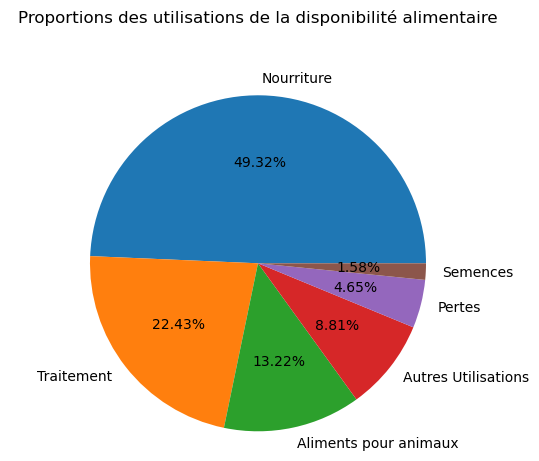

In [40]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
columns =['Aliments pour animaux','Pertes','Nourriture','Semences','Traitement','Autres Utilisations']

dispo=pop2017_dispo_alimentaire['Disponibilité intérieure'].sum()

# initialisation du dictionnaire pour stocker les proportions :
proportions = {}

for col in columns:     
        colonne_somme=pop2017_dispo_alimentaire[col].sum()
        per_colonne=round(colonne_somme/dispo*100,2)
        proportions[col]=per_colonne
       
        print("proportions",col,":")
        print(per_colonne,"%")


# utilisation du dictionnaire pour créé le graphique        
decroissant_proportions = dict(sorted(proportions.items(), key=lambda item: item[1], reverse=True))

# mise en place du graphique avec plt

plt.pie(labels=decroissant_proportions.keys(), x = decroissant_proportions.values(),autopct='%.2f%%')
plt.title('Proportions des utilisations de la disponibilité alimentaire',pad=40)
plt.axis('equal')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [41]:
#Création d'une liste avec toutes les variables
liste_des_aliments=pd.DataFrame([pop2017_dispo_alimentaire["Produit"]])

display(pop2017_dispo_alimentaire)

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,...,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0,341678280.0
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,...,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0,242022115.0
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,...,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0,99656165.0
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,...,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0,14236595.0


In [42]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales = ['Blé','Riz/(Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']

cereales_filtrees = pop2017_dispo_alimentaire[pop2017_dispo_alimentaire['Produit'].isin(cereales)]
total_cereales=cereales_filtrees['Disponibilité intérieure'].sum()

In [43]:
#Affichage de la proportion d'alimentation animale
print("La proportion d'alimentation animale est de",round(cereales_filtrees['Aliments pour animaux'].sum()/total_cereales*100,2),"%.")

La proportion d'alimentation animale est de 43.4 %.


In [44]:
#Affichage de la proportion d'alimentation humaine
print("La proportion d'alimentation humaine est de",round(cereales_filtrees['Nourriture'].sum()/total_cereales*100,2),"%.")

La proportion d'alimentation humaine est de 33.82 %.


La proportion d'alimentation pour autre utilisation est de 22.78 %.


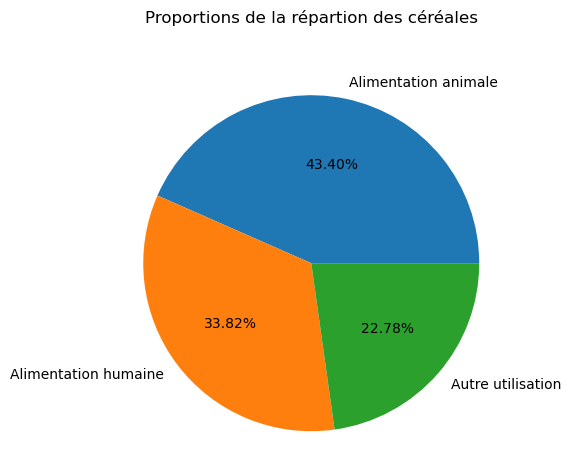

In [45]:
#Affichage autre utilisation
print("La proportion d'alimentation pour autre utilisation est de",100-43.4-33.82,"%.")

#Création du nouveau dictionnaire.
repartition_cereale={"Alimentation animale":43.4,"Alimentation humaine":33.82,"Autre utilisation":22.78}

#Affichage de la répartition cérales

plt.pie(labels=repartition_cereale.keys(), x = repartition_cereale.values(),autopct='%.2f%%')
plt.title('Proportions de la répartion des céréales',pad=40)
plt.axis('equal')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [46]:
#Création de la colonne proportion par pays
pop2017_sn2017['proportion']=round((pop2017_sn2017['sous_nutrition']/pop2017_sn2017['Population']*100),2)
display(pop2017_sn2017)

,Zone,Année_x,Population,Année_y,sous_nutrition,proportion
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,5.44
2,Albanie,2017,2884169.0,2016-2018,100000.0,3.47
3,Algérie,2017,41389189.0,2016-2018,1300000.0,3.14
4,Allemagne,2017,82658409.0,2016-2018,0.0,0.00
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,2016-2018,8000000.0,27.21
199,Viet Nam,2017,94600648.0,2016-2018,6500000.0,6.87
200,Yémen,2017,27834819.0,2016-2018,0.0,0.00
201,Zambie,2017,16853599.0,2016-2018,0.0,0.00


In [47]:
#affichage après trie des 10 pires pays
sous_alimentation_classe=pop2017_sn2017.sort_values('proportion',ascending = False)

sous_alimentation_triee=sous_alimentation_classe[['Zone','proportion']]
sous_alimentation_triee_index_reset = sous_alimentation_triee.reset_index(drop=True)

print("Les 10 pires pays sous alimentées")
display(sous_alimentation_triee_index_reset.head(10))



Les 10 pires pays sous alimentées


,Zone,proportion
0,Haïti,48.26
1,République populaire démocratique de Corée,47.19
2,Madagascar,41.06
3,Libéria,38.28
4,Lesotho,38.25
5,Tchad,37.96
6,Rwanda,35.06
7,Mozambique,32.81
8,Timor-Leste,32.17
9,Afghanistan,28.93


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [48]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_zone=aide_alimentaire.groupby('Zone')[['Valeur']].sum()

print(aide_alimentaire_zone)

                 Valeur
Zone                   
Afghanistan   185452000
Algérie        81114000
Angola          5014000
Bangladesh    348188000
Bhoutan         2666000
...                 ...
Zambie          3026000
Zimbabwe       62570000
Égypte          1122000
Équateur        1362000
Éthiopie     1381294000

[76 rows x 1 columns]


In [49]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_alimentaire_zone_triee=aide_alimentaire_zone.sort_values('Valeur',ascending = False)

top_10_aide_alimentaire=aide_alimentaire_zone_triee.head(10)

print("Les 10 pays qui ont bénéficié le plus d'aide alimentaire")

display(top_10_aide_alimentaire)

Les 10 pays qui ont bénéficié le plus d'aide alimentaire


,Valeur
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [50]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_zone_annee=aide_alimentaire.groupby(['Zone','Année'])[['Valeur']].sum()
print(aide_alimentaire_zone_annee)



                      Valeur
Zone        Année           
Afghanistan 2013   128238000
            2014    57214000
Algérie     2013    35234000
            2014    18980000
            2015    17424000
...                      ...
Égypte      2013     1122000
Équateur    2013     1362000
Éthiopie    2013   591404000
            2014   586624000
            2015   203266000

[228 rows x 1 columns]


In [51]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_pays_avec_plus_daide= ['République arabe syrienne','Éthiopie','Yémen','Soudan du Sud','Soudan'] 

In [52]:
#On filtre sur le dataframe avec notre liste
aide_alimentaire_zone_annee_filtrées = aide_alimentaire_zone_annee.loc[liste_pays_avec_plus_daide,]



In [53]:
# Affichage des pays avec l'aide alimentaire par année

print("Affichage des pays avec l'aide alimentaire par année")

display(aide_alimentaire_zone_annee_filtrées)

Affichage des pays avec l'aide alimentaire par année


Valeur
Zone                      Année           
République arabe syrienne 2013   563566000
                          2014   651870000
                          2015   524949000
                          2016   118558000
Éthiopie                  2013   591404000
                          2014   586624000
                          2015   203266000
Yémen                     2013   264764000
                          2014   103840000
                          2015   372306000
                          2016   465574000
Soudan du Sud             2013   196330000
                          2014   450610000
                          2015    48308000
Soudan                    2013   330230000
                          2014   321904000
                          2015    17650000

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [54]:
#Calcul de la disponibilité en kcal par personne par jour par pays
pop2017_dispo_alimentaire_groupby_zone=pop2017_dispo_alimentaire.groupby('Zone')[['Disponibilité alimentaire (Kcal/personne/jour)']].sum()
display(pop2017_dispo_alimentaire_groupby_zone)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


In [55]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
pays_moins_dispo_alimentaire_triee=pop2017_dispo_alimentaire_groupby_zone.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending = True)

display(pays_moins_dispo_alimentaire_triee.head(10))

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [56]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
pays_moins_dispo_alimentaire_triee=pop2017_dispo_alimentaire_groupby_zone.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending = False)

display(pays_moins_dispo_alimentaire_triee.head(10))

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [57]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_alimentaire_sn2017_merge=pd.merge(pop2017_dispo_alimentaire, pop2017_sn2017, on='Zone')

cas_thailande=dispo_alimentaire_sn2017_merge.loc[(dispo_alimentaire_sn2017_merge['Zone'] == 'Thaïlande')&(dispo_alimentaire_sn2017_merge['Produit']=='Manioc') ,:]

# affichage de toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)
display(cas_thailande)

,Zone,Année,Population_x,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal,Année_x,Population_y,Année_y,sous_nutrition,proportion
14166,Thaïlande,2017,69209810.0,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,2.768392e+09,2017,69209810.0,2016-2018,6200000.0,8.96


In [58]:
#Calcul de la sous nutrition en Thaïlande

#Nombre de personnes sous-alimentées=Population totale×Pourcentage de sous-alimenteés

sous_nutrition_thailande=cas_thailande['Population_x']*(cas_thailande['proportion']/100)

# Extraction de la valeur sans l'indice et le dtype
sous_nutrition_value = sous_nutrition_thailande.iloc[0]

print("Le nombre de personne en sous nutrition en Thaïlande est de {:.0f}".format(sous_nutrition_value),"soit 8.95% de la population")

Le nombre de personne en sous nutrition en Thaïlande est de 6201199 soit 8.95% de la population


In [59]:
# On calcule la proportion exportée en fonction de la proportion
#proportion_exportee = (exportations / production) * 100

balance_commercial=cas_thailande['Exportations - Quantité']-cas_thailande['Importations - Quantité']


# Extraction de la valeur sans l'indice et le dtype

balance_commercial_value = balance_commercial.iloc[0]


print("La balance commercial est de {:.0f}.".format(balance_commercial_value))
print("La balance commercial est positive cela signifie que la Thaïlande exporte plus que elle importe.")



La balance commercial est de 23964000000.
La balance commercial est positive cela signifie que la Thaïlande exporte plus que elle importe.


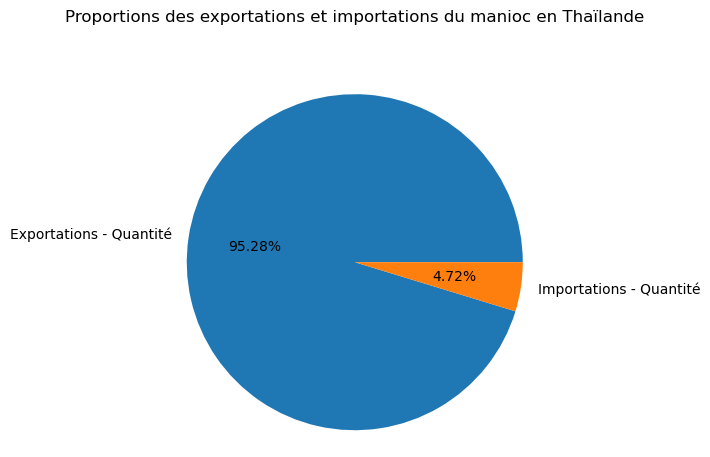

In [60]:
# cas_thailande=cas_thailande.reset_index(drop=False)

dict_etude_thailande={}
columns=['Exportations - Quantité','Importations - Quantité']

for col in columns :
    value=cas_thailande[col].values[0]
    dict_etude_thailande[col]=value
  

# organisation des données pour mise en forme graphique
dict_etude_thailande_classee = dict(sorted(dict_etude_thailande.items(), key=lambda item: item[1], reverse=True))


# mise en forme du graphique
plt.pie(labels=dict_etude_thailande_classee.keys(), x = dict_etude_thailande_classee.values(),autopct='%.2f%%')
plt.title('Proportions des exportations et importations du manioc en Thaïlande',pad=40)
plt.axis('equal')

plt.show()


In [61]:
#proportion_exportee = (exportations / production) * 100
proportion_exportee=(cas_thailande['Exportations - Quantité']/cas_thailande['Production'])*100

# Extraction de la valeur sans l'indice et le dtype
proportion_exportee_value = proportion_exportee.iloc[0]


print("La proportion des exportations totale en Thaïlande represente {:.2f}% de la production totale".format(proportion_exportee_value))
print("La proportion restante dans le pays est de",round(100-83.41,2),"%.")




La proportion des exportations totale en Thaïlande represente 83.41% de la production totale
La proportion restante dans le pays est de 16.59 %.


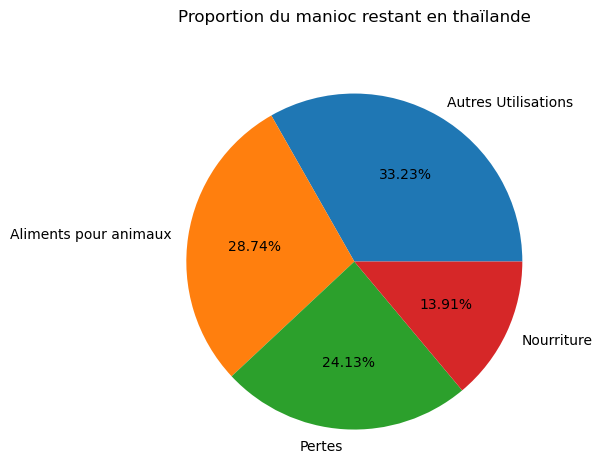

In [62]:
dict_etude_thailande={}
columns=['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes']

for col in columns :
    value=cas_thailande[col].values[0]
    dict_etude_thailande[col]=value
  

# organisation des données pour mise en forme graphique
dict_etude_thailande_classee = dict(sorted(dict_etude_thailande.items(), key=lambda item: item[1], reverse=True))


# mise en forme du graphique
plt.pie(labels=dict_etude_thailande_classee.keys(), x = dict_etude_thailande_classee.values(),autopct='%.2f%%')
plt.title('Proportion du manioc restant en thaïlande',pad=40)
plt.axis('equal')

plt.show()